In [1]:
!gdown 1Roar85CZy0N1dBANBYOcm-MekA2PT3qO
!gdown 1qeye9WAZPy2R08q8y0OjQwPE_09F_rIk

Downloading...
From: https://drive.google.com/uc?id=1Roar85CZy0N1dBANBYOcm-MekA2PT3qO
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 26.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qeye9WAZPy2R08q8y0OjQwPE_09F_rIk
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:01<00:00, 71.8MB/s]


# Importing libraries and functions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score

### Importing the Data

In [3]:
train_data = pd.read_csv("/content/sign_mnist_train.csv")
test_data = pd.read_csv("/content/sign_mnist_test.csv")

In [4]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


### EDA

In [6]:
train_data["label"].unique()

array([  3,   6,   2,  13,  16,   8,  22,  18,  10,  20,  17,  19,  21,
        23,  24,   1,  12,  11,  15,   4,   0,   5,   7,  14, 200])

In [7]:
train_data["label"].value_counts()

17     1294
16     1279
11     1241
22     1225
5      1204
18     1199
3      1196
14     1196
19     1186
23     1164
8      1162
20     1160
13     1151
2      1144
0      1126
24     1118
10     1114
6      1090
15     1088
21     1082
12     1055
7      1013
1      1010
4       957
200       1
Name: label, dtype: int64

In [8]:
train_data[train_data["label"]==200].index

Int64Index([498], dtype='int64')

In [9]:
train_data.drop(index=498,inplace=True)

In [10]:
train_data.isnull().sum().sum()

0

In [11]:
test_data.isnull().sum().sum()

0

Text(0.5, 1.0, '3')

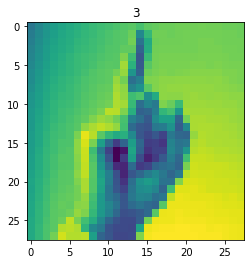

In [12]:
img = np.array(train_data[train_data["label"]==3].iloc[0,1:]).reshape(28,28)
label = 3
plt.imshow(img)
plt.title(label)

In [13]:
# Getting train and test predictor and target variables

X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]

X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

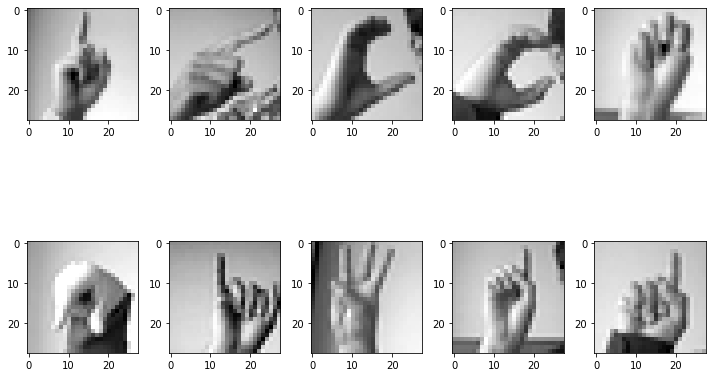

In [14]:
# Viusalizing the normalized grey scaled images
X_train_show = np.array(X_train/255).reshape(len(X_train),28,28,1)
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train_show[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()    

### RandomForest 

In [15]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print("The accuracy of the model is: {:.2f} %".format(accuracy_score(y_test,pred)*100))

The accuracy of the model is: 81.54 %


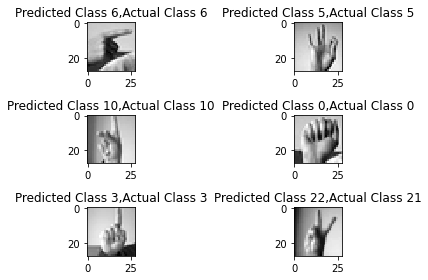

In [16]:
X_test_show = np.array(X_test/255).reshape(len(X_test),28,28,1)
i = 0
for c in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(X_test_show[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(pred[c], y_test[c]))
    plt.tight_layout()
    i += 1

### Ada Boost

In [17]:
clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print("The accuracy of the model is: {:.2f} %".format(accuracy_score(np.array(y_test),pred)*100))

The accuracy of the model is: 31.55 %


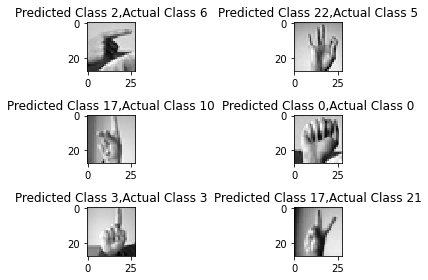

In [18]:
# X_test_show = np.array(X_test/255).reshape(len(X_test),28,28,1)
i = 0
for c in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(X_test_show[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(pred[c], y_test[c]))
    plt.tight_layout()
    i += 1

### Decision Tree

In [19]:
clf  = DecisionTreeClassifier()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print("The accuracy of the model is: {:.2f} %".format(accuracy_score(np.array(y_test),pred)*100))

The accuracy of the model is: 44.55 %


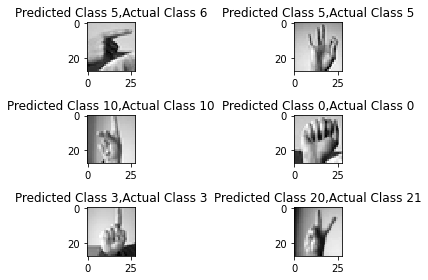

In [20]:
# X_test_show = np.array(X_test/255).reshape(len(X_test),28,28,1)
i = 0
for c in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(X_test_show[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(pred[c], y_test[c]))
    plt.tight_layout()
    i += 1

### CNN 

In [21]:
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]

X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

In [22]:
#Normalizing and transforming the training data suitable for CNN input
X_train=(X_train/255)
X_train = np.array(X_train).reshape(len(X_train),28,28,1)
X_test = (X_test/255)
X_test = np.array(X_test).reshape(len(X_test),28,28,1)

In [23]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [24]:
#Data Augmentation to genrate more training data, prevents overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [25]:
#Implementing learning rate adjustment on runtime 
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.0001)

In [26]:
#create model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(24, activation='softmax'))
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
model.fit(datagen.flow(X_train, y_train,batch_size=128), validation_data=(X_test, y_test), epochs=20,callbacks=[learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 17s 44ms/step - loss: 2.3459 - accuracy: 0.2640 - val_loss: 1.3698 - val_accuracy: 0.5764 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 9s 42ms/step - loss: 1.2452 - accuracy: 0.5844 - val_loss: 0.7179 - val_accuracy: 0.7309 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 10s 46ms/step - loss: 0.7949 - accuracy: 0.7328 - val_loss: 0.5080 - val_accuracy: 0.8009 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 9s 42ms/step - loss: 0.5557 - accuracy: 0.8120 - val_loss: 0.3908 - val_accuracy: 0.8470 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 9s 42ms/step - loss: 0.4411 - accuracy: 0.8491 - val_loss: 0.2705 - val_accuracy: 0.8971 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - 9s 42ms/step - loss: 0.3387 - accuracy: 0.8855 - val_loss: 0.1909 - val_accuracy: 0.9352 - lr: 0.0010
Epoch 7/20
215/215 [==============================] - 9s 42ms/

In [27]:
#generating probabilities for each class
predictions_prob = model.predict(X_test)

225/225 [==============================] - 1s 2ms/step


In [28]:
#converting probabilities to thier respective classes
pred = (np.argmax(predictions_prob, axis=1))

In [29]:
#adjusting the predictions 
for i in range(len(pred)):
    if(pred[i] >= 9):
        pred[i] += 1

In [30]:
#reversing the one hot encoding transformation
actual= y_test.idxmax(axis=1)

In [31]:
print("The accuracy of the CNN model is: {:.2f}%".format(accuracy_score(actual,pred)*100))

The accuracy of the CNN model is: 98.79%


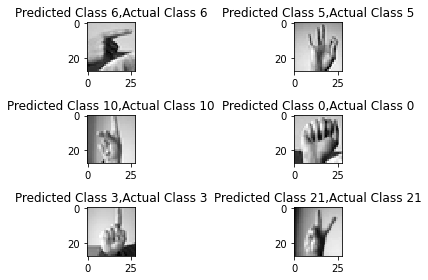

In [32]:
i = 0
for c in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(X_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(pred[c], actual[c]))
    plt.tight_layout()
    i += 1